# The Interplay of Compile-time and Run-time Options for Performance Prediction

This notebook follows the order and produce all the figures depicted in the related submission, "The Interplay of Compile-time and Run-time Options for Performance Prediction"

#### First, we import some libraries

In [2]:
# for arrays
import numpy as np

# for dataframes
import pandas as pd

# plots
import matplotlib.pyplot as plt
# high-level plots
import seaborn as sns

# statistics
import scipy.stats as sc
# hierarchical clustering, clusters
from scipy.cluster.hierarchy import linkage, cut_tree, leaves_list
from scipy import stats
# statistical tests
from scipy.stats import mannwhitneyu

# machine learning library
# Principal Component Analysis - determine new axis for representing data
from sklearn.decomposition import PCA
# Random Forests -> vote between decision trees
# Gradient boosting -> instead of a vote, upgrade the same tree
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier, GradientBoostingClassifier
# To add interactions in linear regressions models
from sklearn.preprocessing import PolynomialFeatures
# Elasticnet is an hybrid method between ridge and Lasso
from sklearn.linear_model import LinearRegression, ElasticNet
# To separate the data into training and test
from sklearn.model_selection import train_test_split
# Simple clustering (iterative steps)
from sklearn.cluster import KMeans

# we use it to interact with the file system
import os
# compute time
from time import time

### Import data

In [65]:
data_dir = "../data/"
name_systems = ["x264", "xz", "nodejs", "poppler"]

data = dict()
default_data = dict()
inputs_name = dict()

for ns in name_systems:
    
    data_path = data_dir+ns+'/'
    
    list_dir = os.listdir(data_path)
    list_dir.remove('ctime_options.csv')
    list_dir.remove('default')

    inputs_name[ns] = os.listdir(data_path+list_dir[0])
    inputs = inputs_name[ns]
    
    for j in range(len(inputs)):
        for i in range(len(list_dir)):
            loc = data_path+list_dir[i]+'/'+inputs[j]
            data[ns, list_dir[i], j] = pd.read_csv(loc)
        
        default_data[ns, j] = pd.read_csv(data_path+'default/'+inputs[j])

# RQ1

# RQ1.1

### Compute some boxplot of runtime performances

#### Figure 2a

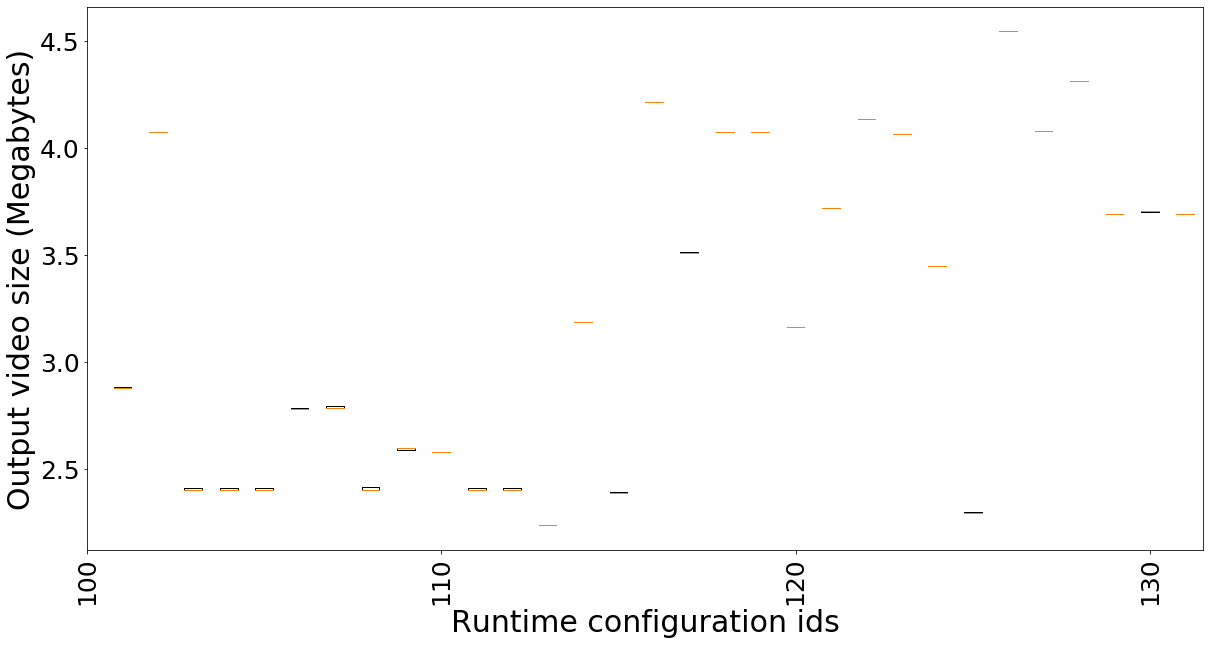

In [230]:
ns ="x264"
dim = "size"
inputs_index = 7

listDim = []
for i in range(len(list_dir)):
    df = data[ns, list_dir[i], inputs_index]
    listDim.append(df[dim]/1e6)

print()

transposed_listDim = []
for i in range(len(listDim[0])):
    transposed_listDim.append([listDim[j][i] for j in range(len(listDim))])

plt.figure(figsize=(20,10))

#plt.title("x264, Sports video, "+dim, size = 25)
plt.ylabel("Output video size (Megabytes)", size = 30)
plt.xlabel("Runtime configuration ids", size=30)

plt.boxplot(transposed_listDim[100:131])
plt.xticks([k for k in range(31) if k%10==0],[k for k in range(100,131) if k%10==0], 
           rotation='vertical', size = 25)
plt.yticks(size=25)
plt.savefig("../results/boxplot_"+ns+"_"+dim+".png")
plt.show()

#### Figure 2b

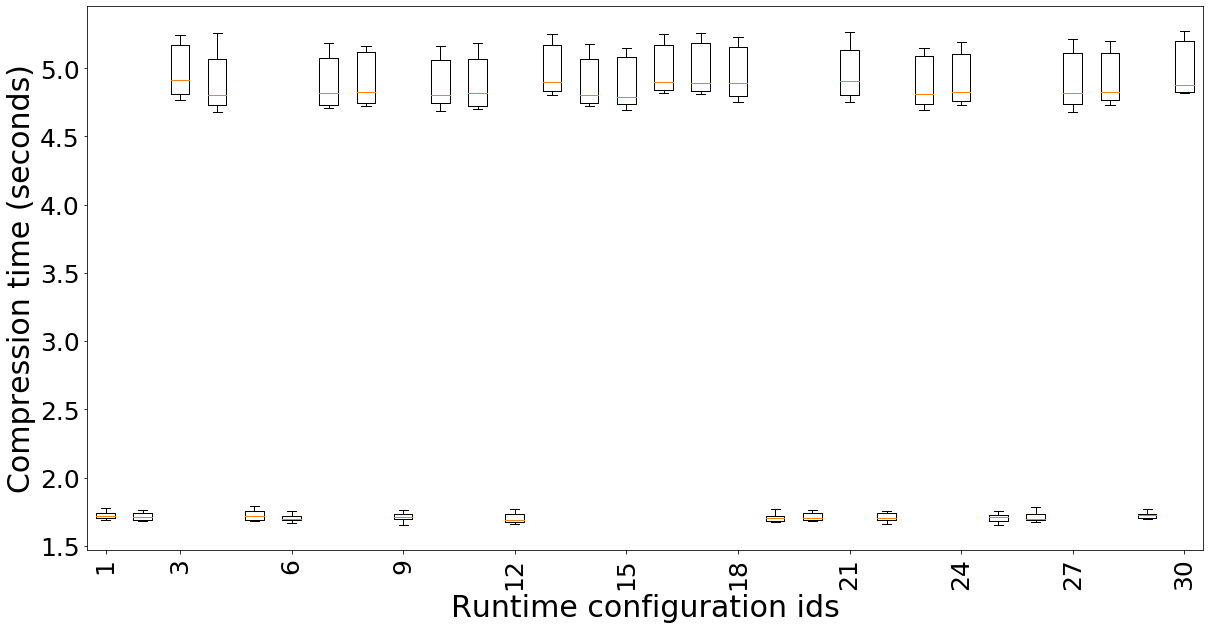

In [231]:
ns ="xz"
dim = "time"
inputs_index = 4

listDim = []
for i in range(len(list_dir)):
    df = data[ns, list_dir[i], inputs_index]
    listDim.append(df[dim])

print()

transposed_listDim = []
for i in range(len(listDim[0])):
    transposed_listDim.append([listDim[j][i] for j in range(len(listDim))])

plt.figure(figsize=(20,10))

#plt.title("xz, Reymont file, "+dim, size = 25)
plt.ylabel("Compression time (seconds)", size = 30)
plt.xlabel("Runtime configuration ids", size = 30)

plt.boxplot(transposed_listDim)
plt.xticks([k for k in range(1,31) if k%3==0 or k==1],[k for k in range(1,31) if k%3==0 or k ==1], 
           rotation='vertical', size =25)
plt.yticks(size=25)
plt.savefig("../results/boxplot_"+ns+"_"+dim+".png")
plt.show()

#### Figure 2c

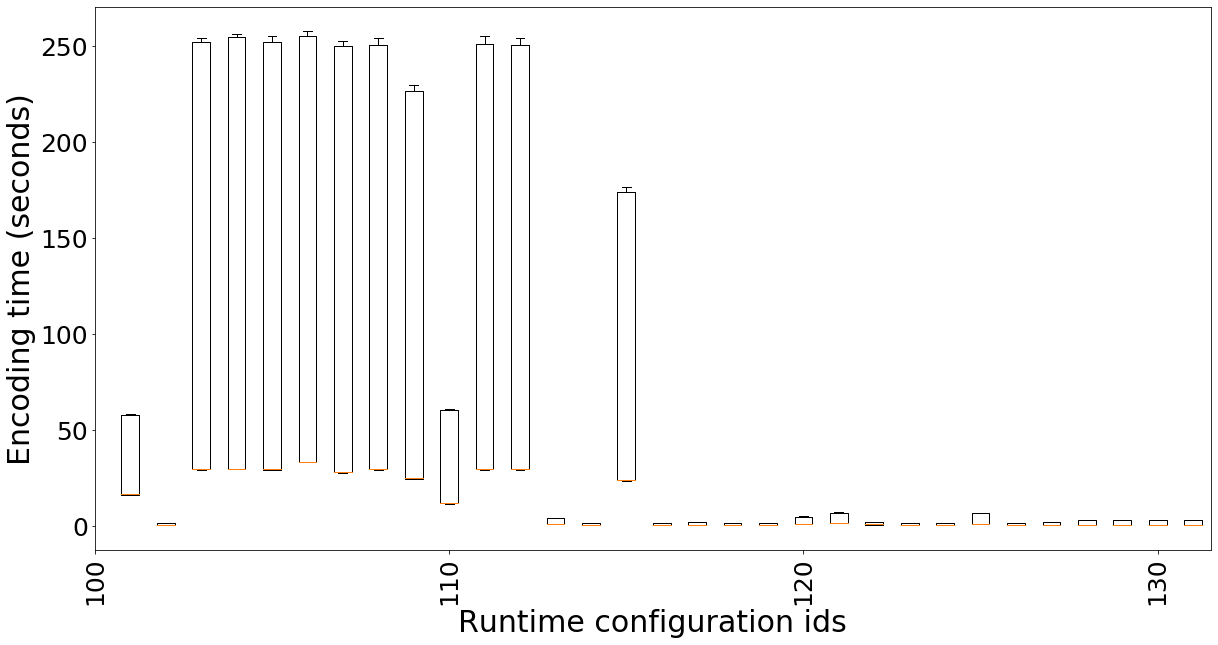

In [232]:
ns ="x264"
dim = "time"
inputs_index = 3

listDim = []
for i in range(len(list_dir)):
    df = data[ns, list_dir[i], inputs_index]
    listDim.append(df[dim])

print()

transposed_listDim = []
for i in range(len(listDim[0])):
    transposed_listDim.append([listDim[j][i] for j in range(len(listDim))])

plt.figure(figsize=(20,10))

#plt.title("x264, Music video, "+dim, size = 30)
plt.ylabel("Encoding time (seconds)", size = 30)
plt.xlabel("Runtime configuration ids", size=30)

plt.boxplot(transposed_listDim[100:131])
plt.xticks([k for k in range(31) if k%10==0],[k for k in range(100,131) if k%10==0], 
           rotation='vertical', size =25)
plt.yticks(size=25)
plt.savefig("../results/boxplot_"+ns+"_"+dim+".png")
plt.show()

In [174]:
inputs_name["x264"]

['original_videos_LiveMusic_360P_LiveMusic_360P-1d94.csv',
 'original_videos_CoverSong_360P_CoverSong_360P-5d20.csv',
 'original_videos_MusicVideo_360P_MusicVideo_360P-5699.csv',
 'original_videos_LyricVideo_360P_LyricVideo_360P-5e87.csv',
 'original_videos_Sports_360P_Sports_360P-4545.csv',
 'original_videos_Gaming_360P_Gaming_360P-56fe.csv',
 'original_videos_Animation_480P_Animation_480P-087e.csv',
 'original_videos_Lecture_360P_Lecture_360P-114f.csv']

#### Figure 2d

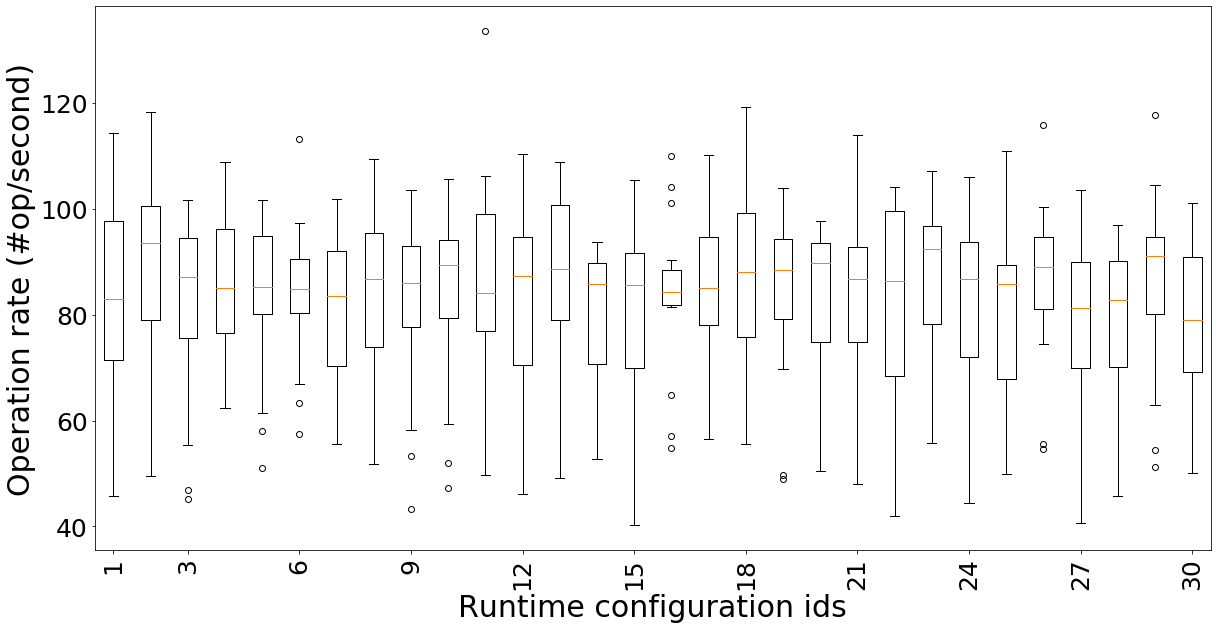

In [233]:
ns ="nodejs"
dim = "ops"
inputs_index = 2

listDim = []
for i in range(len(list_dir)):
    df = data[ns, list_dir[i], inputs_index]
    listDim.append(df[dim])

print()

transposed_listDim = []
for i in range(len(listDim[0])):
    transposed_listDim.append([listDim[j][i] for j in range(len(listDim))])

plt.figure(figsize=(20,10))

#plt.title("nodejs, fsfile script, operation rate", size = 25)
plt.ylabel("Operation rate (#op/second)", size = 30)
plt.xlabel("Runtime configuration ids", size=30)

plt.boxplot(transposed_listDim)
plt.xticks([k for k in range(1,31) if k%3==0 or k==1],[k for k in range(1,31) if k%3==0 or k ==1], 
           rotation='vertical', size =25)
plt.yticks(size=25)
plt.savefig("../results/boxplot_"+ns+"_"+dim+".png")
plt.show()

### Do some tests

### Correlogram - TO ADAPT

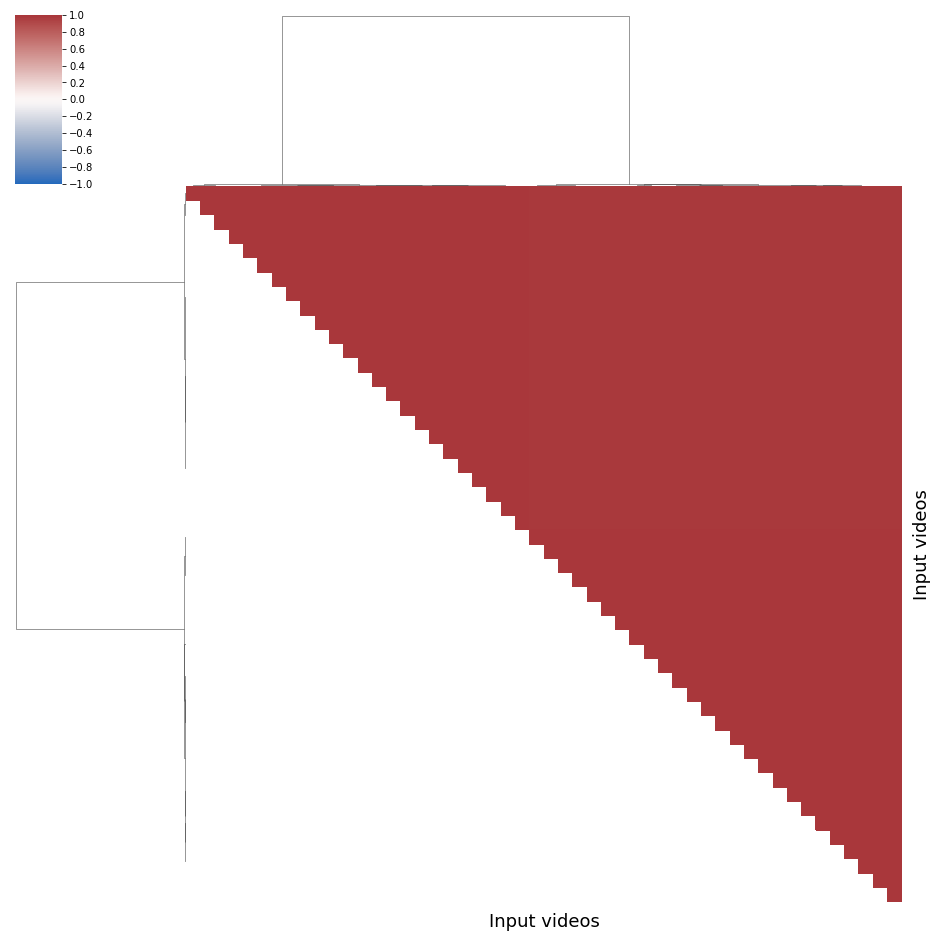

In [187]:
# number of videos
nbVideos = len(list_dir)
    
# matrix of coorelations
corrSpearman = [[0 for x in range(nbVideos)] for y in range(nbVideos)]

for i in range(nbVideos):
    for j in range(nbVideos):
        # A distribution of bitrates will have a correlaiton of 1 with itself
        if (i == j):
            corrSpearman[i][j] = 1
        else:
            # we compute the Spearman correlation between the input video i and the input video j
            corrSpearman[i][j] = sc.spearmanr(data[list_dir[i], inputs[inputs_index]][dim],
                                            data[list_dir[j], inputs[inputs_index]][dim]).correlation
# We define a function to plot the correlogram
def plot_correlationmatrix_dendogram(corr, img_name, ticks, method= 'ward'):
    # inputs : a correlation matrix, or a matrix with quantitative values
    # a name for the image
    # the aggregation method
    # output : a plot of an ordered correlogram with dendograms
    
    # we transform our matrix into a dataframe
    df = pd.DataFrame(corr)
    
    # group the videos, we choose the ward method 
    # single link method (minimum of distance) leads to numerous tiny clusters
    # centroid or average tend to split homogeneous clusters
    # and complete link aggregates unbalanced groups. 
    links = linkage(df, method=method,)
    order = leaves_list(links)
    
    # we order the correlation following the aggregation clustering
    mask = np.zeros_like(corr, dtype=np.bool)
    
    for i in range(nbVideos):
        for j in range(nbVideos):
            # Generate a mask for the upper triangle
            if i>j:
                mask[order[i]][order[j]] = True
    
    # seaborn clustermap plots a nice graph combining the correlogram and dendograms
    # cmap is the colormap, mask hides the lower triangular, method is the aggregation method,
    # linewidth is set to 0 because otherwise we can't see squre colors
    # figsize is the size of figure
    # we cannot print 1400 ticks, wo we hide them
    # to not fool the reviewers, we set the minimum to -1, to plot the full range of correlation
    # -0.69 would give a false impression of high input sensitivity
    g = sns.clustermap(df, cmap="vlag", mask=mask, method=method,
                   linewidths=0, figsize=(13, 13), cbar_kws={"ticks":ticks}, vmin =-1)
    g.ax_heatmap.set_yticklabels([])
    g.ax_heatmap.set_xticklabels([])
    g.ax_heatmap.tick_params(right=False, bottom=False)
    # abcissa and ordered labels
    g.ax_heatmap.set_xlabel("Input videos", fontsize = 18)
    g.ax_heatmap.set_ylabel("Input videos", fontsize = 18)
    # we save the figure in the result folder
    plt.savefig(img_name)
    # we show the graph
    plt.show()

plot_correlationmatrix_dendogram(corrSpearman, 
                                 "../results/"+name_system+"/corrmatrix-Spearman-"+dim+"-"
                                                    +inputs[inputs_index]+".pdf",
                                 [k/5 for k in np.arange(-10,10,1)], method='ward')

# RQ1.2

### Compute the ratio between runtime performances of the compile-time options and the default configuration

#### Table 2a - Average and standard deviation ratios

In [209]:
def get_ratios(name_system, input_index, dim):
    
    list_inputs = inputs_name[name_system]
    
    nb_ctime_configs = len(os.listdir("../data/"+name_system))-2
    
    ratios = []
    
    for i in range(1, nb_ctime_configs+1):
        
        df = data[name_system, str(i), input_index]
        df_def = default_data[name_system, input_index]
        
        ratios.append(df[dim]/df_def[dim])
    
    return (np.round(np.mean(ratios),2), np.round(np.std(ratios),2))

In [210]:
get_ratios("x264", 0, "size")

(1.0, 0.0)

In [222]:
results = dict()

perfs = dict()
perfs["x264"] = ["time", "fps"]
perfs["xz"] = ["time"]
perfs["poppler"] = ["time"]
perfs["nodejs"] = ["ops"]

for ns in name_systems:
    if ns in perfs:
        for p in perfs[ns]:                
            nb_inputs = len(inputs_name[ns])
            for input_index in range(nb_inputs):
                results[ns, input_index+1, p] = get_ratios(ns, input_index, p)

print("\\begin{tabular}{|c|c|c|c|c|c|}")
perfs = sorted(pd.Series([(k[0], k[2]) for k in results.keys()]).unique())
print("\\hline")
print("System")
print("& nodejs")
print("& poppler")
print("& \\multicolumn{2}{|c|}{x264}")
print("& xz")
#for i in range(len(perfs)):
#    print("& "+perfs[i][0])
print("\\\\ \\hline")
print("Perf. $\mathcal{P}$")
for i in range(len(perfs)):
    print("& "+perfs[i][1])
print("\\\\ \\hline")
for i in range(1, 13):
    print("$\mathcal{I}$\\#"+str(i))
    for j in range(len(perfs)):
        if i <= len(inputs_name[perfs[j][0]]):
            if results[perfs[j][0], i, perfs[j][1]]:
                mean_ratios, std_ratios = results[perfs[j][0], i, perfs[j][1]]
                print("& "+str(mean_ratios)+" $\pm$ "+str(std_ratios))
        else:
            print("& \\cellcolor[HTML]{C0C0C0}")
    print("\\\\ \\hline")
print("\\end{tabular}")

\begin{tabular}{|c|c|c|c|c|c|}
\hline
System
& nodejs
& poppler
& \multicolumn{2}{|c|}{x264}
& xz
\\ \hline
Perf. $\mathcal{P}$
& ops
& time
& fps
& time
& time
\\ \hline
$\mathcal{I}$\#1
& 0.8 $\pm$ 0.34
& 1.0 $\pm$ 0.02
& 0.59 $\pm$ 0.4
& 3.33 $\pm$ 2.4
& 1.01 $\pm$ 0.03
\\ \hline
$\mathcal{I}$\#2
& 0.79 $\pm$ 0.36
& 1.0 $\pm$ 0.01
& 0.59 $\pm$ 0.39
& 3.5 $\pm$ 2.53
& 1.16 $\pm$ 0.48
\\ \hline
$\mathcal{I}$\#3
& 0.86 $\pm$ 0.2
& 1.0 $\pm$ 0.01
& 0.59 $\pm$ 0.4
& 3.5 $\pm$ 2.57
& 1.11 $\pm$ 0.32
\\ \hline
$\mathcal{I}$\#4
& 1.01 $\pm$ 0.11
& 1.0 $\pm$ 0.01
& 0.6 $\pm$ 0.39
& 3.26 $\pm$ 2.37
& 1.01 $\pm$ 0.02
\\ \hline
$\mathcal{I}$\#5
& 0.73 $\pm$ 0.41
& 1.0 $\pm$ 0.01
& 0.59 $\pm$ 0.4
& 3.53 $\pm$ 2.62
& 1.02 $\pm$ 0.03
\\ \hline
$\mathcal{I}$\#6
& 1.05 $\pm$ 0.21
& 1.0 $\pm$ 0.02
& 0.6 $\pm$ 0.4
& 3.35 $\pm$ 2.49
& 1.01 $\pm$ 0.02
\\ \hline
$\mathcal{I}$\#7
& 0.98 $\pm$ 0.01
& 1.0 $\pm$ 0.07
& 0.58 $\pm$ 0.4
& 3.75 $\pm$ 2.8
& 1.01 $\pm$ 0.03
\\ \hline
$\mathcal{I}$\#8
& 0.84 $\pm$ 

#### Table 2b - Best ratios (minimal time, and max fps or operation per second)

In [223]:
def get_ratios_indic(name_system, input_index, dim, indic):
    
    list_inputs = inputs_name[name_system]
    
    nb_ctime_configs = len(os.listdir("../data/"+name_system))-2
    
    ratios = []
    
    for i in range(1, nb_ctime_configs+1):
        
        df = data[name_system, str(i), input_index]
        df_def = default_data[name_system, input_index]
        
        ratios.append(df[dim]/df_def[dim])
    
    if indic == "max":
        res = np.round(np.max(ratios), 2)
    if indic == "min":
        res = np.round(np.min(ratios), 2)
    
    return res

results = dict()

perfs = dict()
perfs["x264"] = ["time", "fps"]
perfs["xz"] = ["time"]
perfs["poppler"] = ["time"]
perfs["nodejs"] = ["ops"]

for ns in name_systems:
    if ns in perfs:
        for p in perfs[ns]:
            nb_inputs = len(inputs_name[ns])
            if p == "time":
                for input_index in range(nb_inputs):
                    results[ns, input_index+1, p] = get_ratios_indic(ns, input_index, p, "min")
            else:
                for input_index in range(nb_inputs):
                    results[ns, input_index+1, p] = get_ratios_indic(ns, input_index, p, "max")
                    
print("\\begin{tabular}{|c|c|c|c|c|c|}")
perfs = sorted(pd.Series([(k[0], k[2]) for k in results.keys()]).unique())
print("\\hline")
print("System")
print("& nodejs")
print("& poppler")
print("& \\multicolumn{2}{|c|}{x264}")
print("& xz")
#for i in range(len(perfs)):
#    print("& "+perfs[i][0])
print("\\\\ \\hline")
print("Perf. $\mathcal{P}$")
for i in range(len(perfs)):
    print("& "+perfs[i][1])
print("\\\\ \\hline")
for i in range(1, 13):
    print("$\mathcal{I}$\\#"+str(i))
    for j in range(len(perfs)):
        if i <= len(inputs_name[perfs[j][0]]):
            if results[perfs[j][0], i, perfs[j][1]]:
                print("& "+str(results[perfs[j][0], i, perfs[j][1]]))
        else:
            print("& \\cellcolor[HTML]{C0C0C0}")
    print("\\\\ \\hline")
print("\\end{tabular}")

\begin{tabular}{|c|c|c|c|c|c|}
\hline
System
& nodejs
& poppler
& \multicolumn{2}{|c|}{x264}
& xz
\\ \hline
Perf. $\mathcal{P}$
& ops
& time
& fps
& time
& time
\\ \hline
$\mathcal{I}$\#1
& 1.06
& 0.95
& 1.12
& 0.94
& 0.95
\\ \hline
$\mathcal{I}$\#2
& 1.08
& 0.98
& 1.14
& 0.93
& 0.98
\\ \hline
$\mathcal{I}$\#3
& 1.48
& 0.98
& 1.12
& 0.95
& 0.97
\\ \hline
$\mathcal{I}$\#4
& 1.68
& 0.97
& 1.27
& 0.83
& 0.96
\\ \hline
$\mathcal{I}$\#5
& 1.18
& 0.97
& 1.1
& 0.94
& 0.96
\\ \hline
$\mathcal{I}$\#6
& 2.3
& 0.95
& 1.68
& 0.51
& 0.97
\\ \hline
$\mathcal{I}$\#7
& 1.01
& 0.84
& 1.35
& 0.94
& 0.94
\\ \hline
$\mathcal{I}$\#8
& 2.28
& 0.97
& 1.12
& 0.93
& 0.97
\\ \hline
$\mathcal{I}$\#9
& 1.04
& 0.95
& \cellcolor[HTML]{C0C0C0}
& \cellcolor[HTML]{C0C0C0}
& 0.97
\\ \hline
$\mathcal{I}$\#10
& 1.09
& 0.92
& \cellcolor[HTML]{C0C0C0}
& \cellcolor[HTML]{C0C0C0}
& 0.97
\\ \hline
$\mathcal{I}$\#11
& \cellcolor[HTML]{C0C0C0}
& \cellcolor[HTML]{C0C0C0}
& \cellcolor[HTML]{C0C0C0}
& \cellcolor[HTML]{C0C0C0}
& 0.